In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
explore_user = pd.read_csv("../explore_user_common.csv")

In [30]:
explore_user.columns

Index(['Unnamed: 0', 'Submission id', 'condition', 'Age', 'Sex', 'education',
       'job', 'start_time', 'end_time', 'Time taken',
       'identification_with_goal', 'current_pursuit_of_target',
       'readiness_to_change_start', 'readiness_to_change_end',
       'general_remarks', 'attention_check_passed', 'Therapeutic Alliance',
       'Perception of MI', 'User Engagement - Focused Attention',
       'User Engagement - Perceived Usability', 'User Engagement - Reward',
       'User Engagement - Overall', 'Communication Competence',
       'Perceived Empathy', 'Readiness to Change (Delta)',
       'Stage of Change (Start)', 'chat_id'],
      dtype='object')

In [31]:
explore_user['condition'].unique()

array(['framework', 'no_system'], dtype=object)

In [32]:
explore_user.describe()

,Unnamed: 0,Time taken,identification_with_goal,current_pursuit_of_target,readiness_to_change_start,readiness_to_change_end,attention_check_passed,Therapeutic Alliance,Perception of MI,User Engagement - Focused Attention,User Engagement - Perceived Usability,User Engagement - Reward,User Engagement - Overall,Communication Competence,Perceived Empathy,Readiness to Change (Delta),chat_id
count,160.000000,160.000000,159.000000,159.000000,159.000000,159.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,159.000000,160.000000
mean,91.462500,38.782687,7.962264,6.490566,6.251572,7.037736,0.031250,2.512500,32.593750,2.639583,3.850000,3.297917,3.263108,3.773438,2.916667,0.786164,92.268750
std,51.984987,221.435320,2.258281,2.502829,2.247273,2.152087,0.174539,0.869960,5.495907,0.906512,1.081449,1.056474,0.856870,0.861838,1.087378,2.023172,54.885211
min,0.000000,10.560000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.111111,1.000000,1.000000,-8.000000,1.000000
25%,45.750000,16.305000,7.000000,5.000000,5.000000,6.000000,0.000000,1.812500,29.000000,2.000000,3.250000,2.333333,2.666667,3.250000,2.250000,0.000000,44.750000
50%,94.500000,19.525000,9.000000,7.000000,7.000000,7.000000,0.000000,2.583333,32.000000,2.666667,4.000000,3.333333,3.444444,3.875000,3.000000,1.000000,92.500000
75%,136.250000,23.270000,10.000000,8.000000,8.000000,9.000000,0.000000,3.166667,36.000000,3.333333,4.666667,4.000000,3.888889,4.500000,3.666667,2.000000,136.250000
max,179.000000,2819.540000,10.000000,10.000000,10.000000,10.000000,1.000000,4.666667,48.000000,4.666667,5.000000,5.000000,4.888889,5.000000,5.000000,9.000000,192.000000


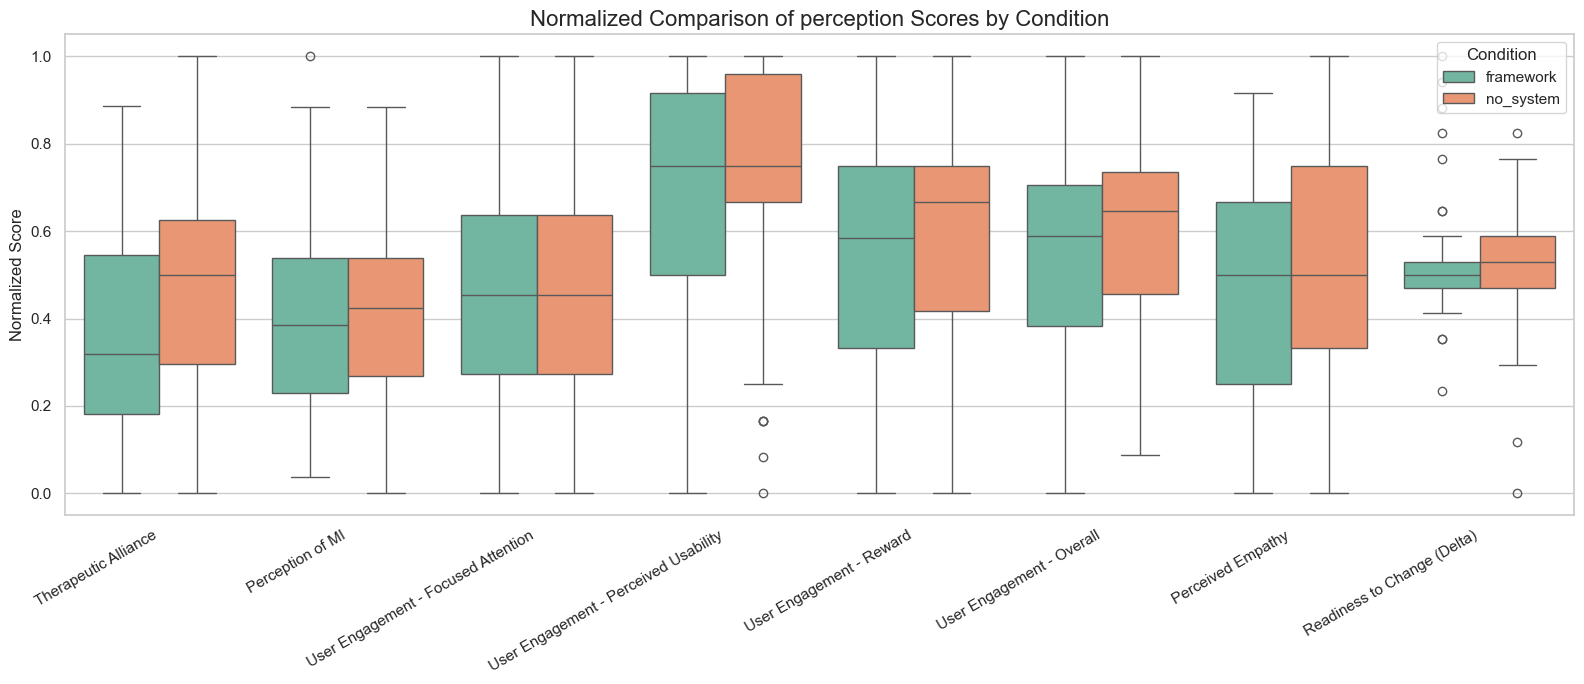

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define target variables to compare
target_vars = [
    'Therapeutic Alliance',
    'Perception of MI',
    'User Engagement - Focused Attention',
    'User Engagement - Perceived Usability',
    'User Engagement - Reward',
    'User Engagement - Overall',
    'Perceived Empathy',
    'Readiness to Change (Delta)'
]

# Create a copy of the relevant columns
df_plot = explore_user[['condition'] + target_vars].copy()

# Apply Min-Max normalization to target variables
scaler = MinMaxScaler()
df_plot[target_vars] = scaler.fit_transform(df_plot[target_vars])

# Convert to long format for seaborn plotting
df_melted = df_plot.melt(id_vars='condition',
                         value_vars=target_vars,
                         var_name='Variable',
                         value_name='Normalized Score')

# Plot
plt.figure(figsize=(16, 7))
sns.boxplot(data=df_melted, x='Variable', y='Normalized Score', hue='condition', palette='Set2')

plt.title('Normalized Comparison of perception Scores by Condition', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.legend(title='Condition', loc='upper right')  # Place legend at the top-right
plt.tight_layout()
plt.show()


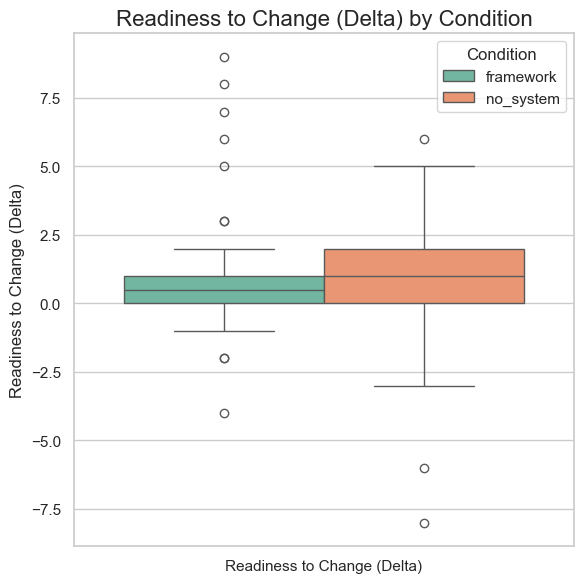

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Add a dummy column to place both conditions at same x-axis point
explore_user['dummy'] = 'Readiness to Change (Delta)'

plt.figure(figsize=(6, 6))
sns.boxplot(data=explore_user,
            x='dummy',
            y='Readiness to Change (Delta)',
            hue='condition',
            palette='Set2')

plt.title('Readiness to Change (Delta) by Condition', fontsize=16)
plt.xlabel('')
plt.ylabel('Readiness to Change (Delta)')
plt.legend(title='Condition', loc='upper right')
plt.tight_layout()
plt.show()
